<a href="https://colab.research.google.com/github/lucasdonizete/RedesNeurais/blob/main/RedeNeural_CIP_TE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas

# Inicialmente é necessário definir as bibliotecas que serão utilizadas para a execução do código corretamente:
import numpy as np
# numpy é a biblioteca numérica do Phyton
import pandas as pd
# pandas é a biblioteca responsável pela manipulação de arquivos
import matplotlib.pyplot as plt
# matplotlib.pyplot é a biblioteca usada para fazer gráficos no Phyton
from sklearn.neural_network import MLPRegressor
# sklearn.neural_network é a biblioteca usada para fazer classificação e regressão, neste caso, ela faz a regressão (MLPRegressor)
from sklearn.model_selection import train_test_split
#separa em treino e teste
from sklearn import preprocessing
#normaliza e retorna os dados
from sklearn.metrics import mean_squared_error
# Essa biblioteca é usada para fazer a soma dos quadrados dos desvios
from sklearn.metrics import r2_score 
# Essa biblioteca foi criada para avaliar se o ajuste está bom através do coeficiente de determinação
from scipy import optimize
#Biblioteca de otimização
from google.colab import files
# Essa biblioteca é usada para carregar arquivos no Phyton

In [2]:
# para gerar o grafico no browser
%matplotlib inline

In [3]:
!git clone https://github.com/lucasdonizete/RedesNeurais
%cd RedesNeurais

fatal: destination path 'RedesNeurais' already exists and is not an empty directory.
/content/RedesNeurais


In [4]:
# leitura dos dados
df=pd.read_csv("Dados_TeseCIP_Lucas.CSV")
print(df.head())

  Exp  X1  X2  X3  X4    TR    TE   COT   EXP   RED
0   1   1   1   1  -1  5.01  1.38  3.92  5.79  5.31
1   2   1   1  -1  -1  4.95  1.50  4.15  5.63  5.31
2   3   1  -1   1   1  5.07  1.55  3.46  5.95  6.09
3   4  -1   1  -1   1  5.34  2.09  5.06  5.91  5.05
4   5   1  -1  -1   1  5.74  2.41  4.19  5.61  6.12


In [5]:
# separa as colunas de interesse

Index=[1,2,3,4,6]
X=df.iloc[:,Index].copy()
print(X.head())


   X1  X2  X3  X4    TE
0   1   1   1  -1  1.38
1   1   1  -1  -1  1.50
2   1  -1   1   1  1.55
3  -1   1  -1   1  2.09
4   1  -1  -1   1  2.41


In [6]:
Index=[ 'TE']
y =df[Index]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3)# 1

In [8]:
#Normatiza os dados através da biblioteca pre-processing
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)

In [9]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y_train)
y_test = scaler_Y.transform(y_test)

In [10]:
# define a rede neural 

model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(15,16), max_iter=500,random_state=1 )

In [11]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(15, 16), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [12]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
y_calc_test=model.predict(X_test)

In [13]:
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))

In [14]:
print(pd.DataFrame({'test calc':y_calc_test.ravel(),'test true':y_obs_test.ravel()}))

   test calc  test true
0   1.875433       1.85
1   2.442232       2.41
2   2.917373       2.92
3   1.229736       1.23
4   2.389755       2.39


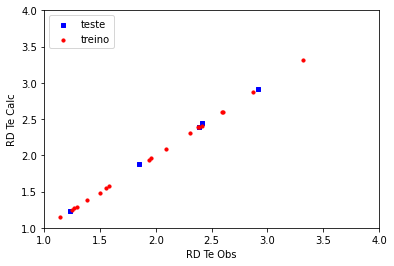

In [15]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.xlim([1,4])
plt.ylim([1,4])
plt.ylabel('RD Te Calc')
plt.xlabel('RD Te Obs')
plt.show()

In [16]:
mse=mean_squared_error(y_obs_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_obs_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.00033855746862286243
R^2 teste= 0.9989765493693383


In [17]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 3.1996578702604686e-05
R^2 treino= 0.9999147606674083


In [18]:
def function(scaler_X):
  global model
  scaler_X=scaler_X.reshape((1, 5))
  df = pd.DataFrame(scaler_X)
  Y=model.predict(df)
  fun=Y*(-1)
  return fun

In [19]:
bounds = [(-2, 2),(-2, 2),(-2, 2),(-2,2),(0,6)]
Condicoes = optimize.differential_evolution(function,bounds)
#Condicoes=pd.DataFrame(Condicoes.scaler_X.reshape(1, 4))
print(Condicoes)

     fun: array([-2.86520716])
     jac: array([ 0.00000000e+00, -1.06581410e-06,  1.04556541e-01,  1.77635684e-07,
       -6.39838849e-02])
 message: 'Optimization terminated successfully.'
    nfev: 1254
     nit: 15
 success: True
       x: array([ 0.01570574, -0.80478747, -2.        , -1.62899777,  6.        ])
